In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.cm as cm

In [2]:
phase1 = 2*np.pi*np.linspace(0,1,100)
phase2 = 2*np.pi*np.linspace(0,1,100)

In [3]:
import itertools

In [4]:
itertools.product(phase1,phase2)

In [5]:
angles = []
for i in itertools.product(phase1,phase2):
    angles.append(np.array(i))
angles = np.array(angles)

In [6]:
thorus = np.zeros((len(angles), 4))

In [7]:
thorus[:,0] = 0.5*(np.cos(angles[:,0]))
thorus[:,1] = 0.5*(np.sin(angles[:,0]))
thorus[:,2] = 0.5*(np.cos(angles[:,1]))
thorus[:,3] = 0.5*(np.sin(angles[:,1]))


In [8]:
np.unique(angles[:,0])

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [9]:
thorus[:,0].shape

(10000,)

In [10]:
plt.figure(figsize = (10,10))
plt.scatter(thorus[:,0], thorus[:,1])
plt.show()

In [11]:
axes[0]

NameError: name 'axes' is not defined

In [12]:
fig= plt.figure(figsize = (10,10))
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(thorus[:,0], thorus[:,1], thorus[:,2],c = np.arange(len(thorus)), cmap = cm.bone)
fig.show()

In [80]:
%matplotlib qt5

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
# Get colormap
colormap = mpl.cm.get_cmap('autumn')
colors_linspace = np.linspace(0,1,sg.num_phases+1)
x_direction = 2
y_direction = 0
z_direction = 3
phase_dir = 0
for phase_dir in range(2):
    for num_phase, phase in enumerate(sg.phase_linspace):
        ax.scatter(latent[phase_combinations[:,phase_dir]==phase,x_direction], 
                       latent[phase_combinations[:,phase_dir]==phase,y_direction],
                       latent[phase_combinations[:,phase_dir]==phase,z_direction],
                       c=colormap(colors_linspace[num_phase]))
        ax.set_xlabel('Z'+str(x_direction))
        ax.set_ylabel('Z'+str(y_direction))
        ax.set_zlabel('Z'+str(z_direction))
    #     ax.legend()
    fig.show()


NameError: name 'mpl' is not defined

In [77]:
from itertools import product
# Parameters
num_phases = 100
num_samples = 50
omega_values = [2*np.pi, 4*np.pi]

# Sampling from phase and space
phase_linspace = 2*np.pi*np.linspace(0,1,num_phases)
space_linspace = np.linspace(0,1,num_samples)
# Create all possible combinations of phi_1, phi_2
phase_combinations = np.array(list(product(phase_linspace, phase_linspace)))
dataset = np.zeros((num_samples, num_samples, len(phase_combinations)))


# Create spatial mesh
spatial_mesh = np.meshgrid(space_linspace, space_linspace)

# Generate signals for each combination
for num_mesh, mesh_dimension in enumerate(spatial_mesh):
    # Omega*dimension
    mesh_expanded_dim = omega_values[num_mesh]*mesh_dimension[:,:,np.newaxis]
    repeated_volume = np.repeat(mesh_expanded_dim, repeats = len(phase_combinations),axis=2)
    # sine(Omega*dimension+phase)
    dataset += np.sin(np.add(repeated_volume, phase_combinations[:,num_mesh]))
dataset = np.swapaxes(dataset,2,0)

In [79]:
dataset[0,:,:].shape

(50, 50)

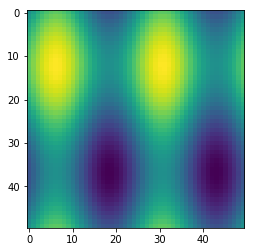

In [78]:
%matplotlib inline 
plt.imshow(dataset[0,:,:])
plt.show()